In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Data set
testdata = pd.read_csv("test_csv.csv")
traindata = pd.read_csv("train_csv.csv")

In [3]:
# Only taking the feature coulmn
training_set = traindata.iloc[:, 2:3].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with  timesteps and 1 output

X_train = []
y_train = []
for i in range(5, 80):
    X_train.append(training_set_scaled[i-5:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
# we have to reshape the data into 3D
# 1s is no of lines in X_train ,2nd is no of times step(coulmn od xtrain),3rd is no of predector the features
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
# We use return_sequence true because we are addind anather layer after it, at the last layer it will be False

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
regressor.add(Dense(units = 1))

In [15]:
# For optimizer we can go through keras optimizers Docomentation
# As it is regression problem so we use mean squared error
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
 #Fitting the RNN to the Training set
# For best fit accourding to data we can increase the epochs
# For forward & back propageted and update weights we use 5  inputs to train 
regressor.fit(X_train, y_train, epochs = 150, batch_size = 50)

Epoch 1/150
75/75 [==============================] - 3s 41ms/step - loss: 0.1248
Epoch 2/150
75/75 [==============================] - 0s 827us/step - loss: 0.1105
Epoch 3/150
75/75 [==============================] - 0s 801us/step - loss: 0.0964
Epoch 4/150
75/75 [==============================] - 0s 787us/step - loss: 0.0825
Epoch 5/150
75/75 [==============================] - 0s 801us/step - loss: 0.0679
Epoch 6/150
75/75 [==============================] - 0s 894us/step - loss: 0.0556
Epoch 7/150
75/75 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 8/150
75/75 [==============================] - 0s 907us/step - loss: 0.0504
Epoch 9/150
75/75 [==============================] - 0s 961us/step - loss: 0.0586
Epoch 10/150
75/75 [==============================] - 0s 801us/step - loss: 0.0511
Epoch 11/150
75/75 [==============================] - 0s 854us/step - loss: 0.0456
Epoch 12/150
75/75 [==============================] - 0s 774us/step - loss: 0.0469
Epoch 13/150
75/

75/75 [==============================] - 0s 680us/step - loss: 0.0464
Epoch 101/150
75/75 [==============================] - 0s 680us/step - loss: 0.0458
Epoch 102/150
75/75 [==============================] - 0s 667us/step - loss: 0.0473
Epoch 103/150
75/75 [==============================] - 0s 827us/step - loss: 0.0453
Epoch 104/150
75/75 [==============================] - 0s 734us/step - loss: 0.0445
Epoch 105/150
75/75 [==============================] - 0s 720us/step - loss: 0.0466
Epoch 106/150
75/75 [==============================] - 0s 867us/step - loss: 0.0444
Epoch 107/150
75/75 [==============================] - 0s 761us/step - loss: 0.0468
Epoch 108/150
75/75 [==============================] - 0s 894us/step - loss: 0.0455
Epoch 109/150
75/75 [==============================] - 0s 921us/step - loss: 0.0459
Epoch 110/150
75/75 [==============================] - 0s 827us/step - loss: 0.0453
Epoch 111/150
75/75 [==============================] - 0s 787us/step - loss: 0.0455
Epoch 

In [20]:
# Getting the real features from the data
dataset_test = pd.read_csv("train_csv.csv")
real_feature = dataset_test.iloc[:, 2:3].values

In [21]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((traindata['feature'], dataset_test['feature']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(5, 80):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_feature = regressor.predict(X_test)
predicted_feature = sc.inverse_transform(predicted_feature)

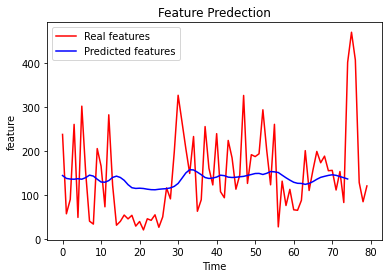

In [22]:
# Visualising the results
plt.plot(real_feature, color = 'red', label = 'Real features')
plt.plot(predicted_feature, color = 'blue', label = 'Predicted features')
plt.title('Feature Predection')
plt.xlabel('Time')
plt.ylabel('feature')
plt.legend()
plt.show()